In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gap_complexity_utils as gaps
from gap_complexity_utils import EnsemblePair, SimulationPair

# How long does it take for the time-averaged gap complexity to converge?

We compute the secular solution to each hypothetical system's dynamics over an arbitrary length of time. Only timescales much greater than the longest secular period in the system, however, are useful, since it will take at least that long for the time-averaged gap complexity $\langle \tilde{\mathcal{C}} \rangle$ to converge to a roughly steady value.

In this notebook, we show that a simulation time in $G = 1$ units of $\sim 10^7$ is likely sufficient for all of our simulated cases. The simulations from which we gather the results presented in the paper are run to $10^9$.

In [2]:
rng_seed = 144

In [3]:
ensemble = EnsemblePair(100, 5, og_inc=10.0, rng_seed=rng_seed)
ensemble.sample("grid")
ensemble.run()

pers = np.empty((ensemble.num_simulations,))
for ii, pair in enumerate(ensemble.pairs.ravel()):
    pers[ii] = pair.longest_secular_period() / pair.min_dynamical_timescale
print(f'The longest secular period in any of these simulations is %f in our units.' % pers.max())

The longest secular period in any of these simulations is 231546836.733499 in our units.


In [4]:
def multiple_simulation_times(times, m=1.0e-2, a=3.75, og_inc=10., N=4, makeplot=True):
    gc_diffs = np.empty(times.shape)
    for ii, t in enumerate(times):
        # print(f"%f times the innermost orbit." % t)
        simpair = SimulationPair(
            N, og_inc=og_inc, simulation_time=t, rng_seed=rng_seed
        )
        simpair.add(m, a)
        simpair.get_ll_systems()
        simpair.get_ll_solutions()
        simpair.get_gap_complexities()
        gc_diffs[ii] = simpair.mean_gc_with - simpair.mean_gc_wout
        # print(f"Average gap complexity change: %f." % gc_diffs[ii])
        if makeplot:
            simpair.plot()
        # print()
    return gc_diffs

def time_dependence_plot(times, smas, m=1.0e-2, N=4, og_inc=10.):
    fig, ax = plt.subplots(1, 1, dpi=200)
    # ax.axvline(np.log10(5.0e4), c="k", ls="dashed", alpha=0.3) # time used originally
    for a in smas:
        gc_diffs = multiple_simulation_times(times, m, a, og_inc, N, makeplot=False)
        ax.plot(np.log10(times), gc_diffs, "-o", label=f"$a = %i$" % int(np.round(a)))
    ax.set_xlabel("log(simulation time)")
    ax.set_ylabel(
        r"$\langle \tilde{\mathcal{C}}_2 \rangle - \langle \tilde{\mathcal{C}}_1 \rangle$"
    )
    ax.set_ylim(-0.01, 0.25)
    ax.legend(loc="upper left", ncol=5, fontsize=8)
    # fig.savefig("gc-change-time-dependence.pdf")
    return

The following plots show how the computed average gap complexity varies according to the choice of time span.

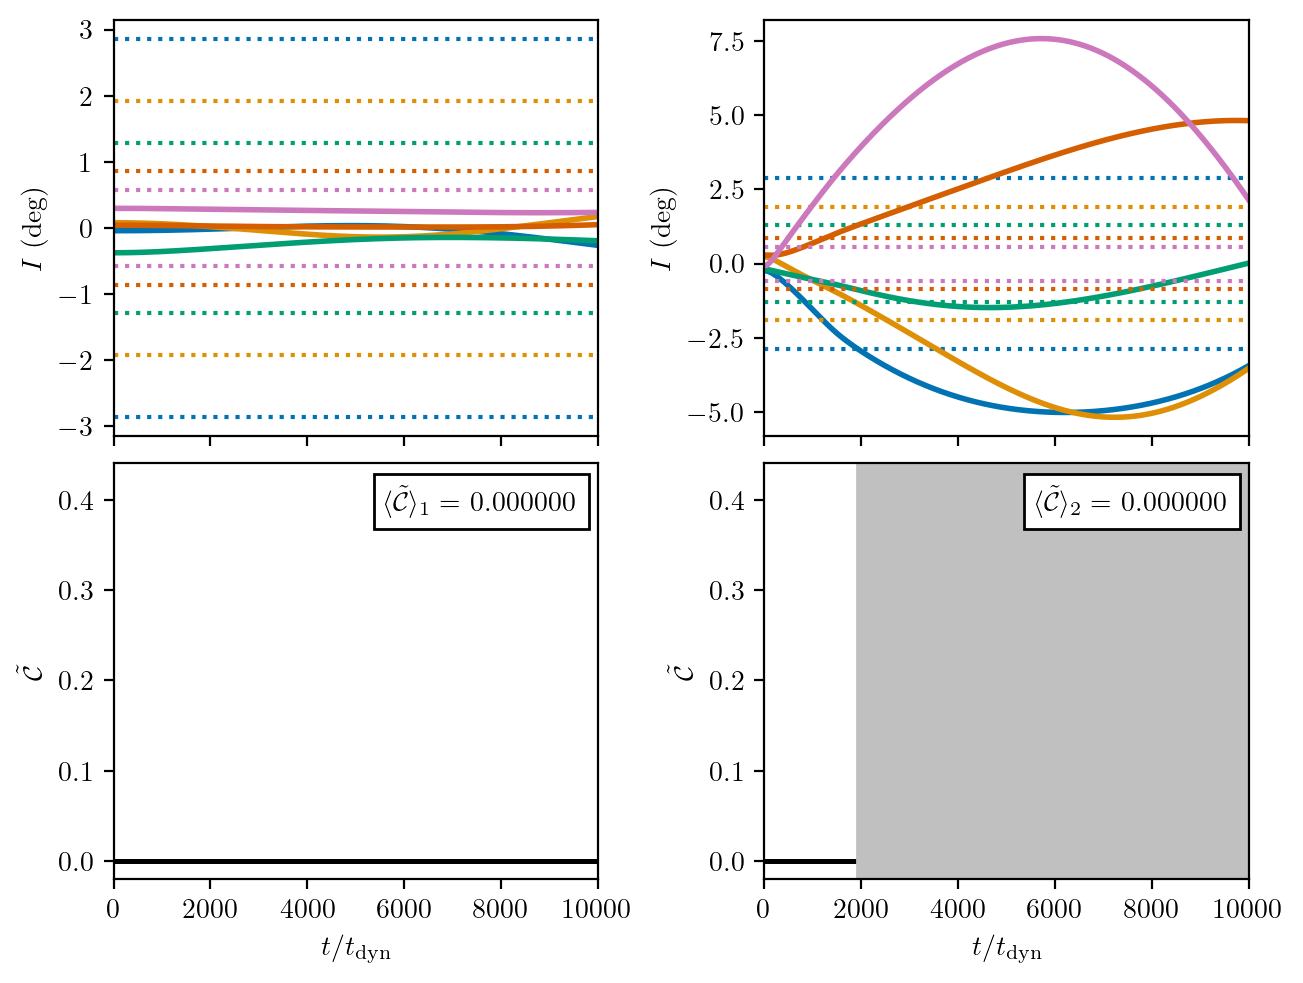

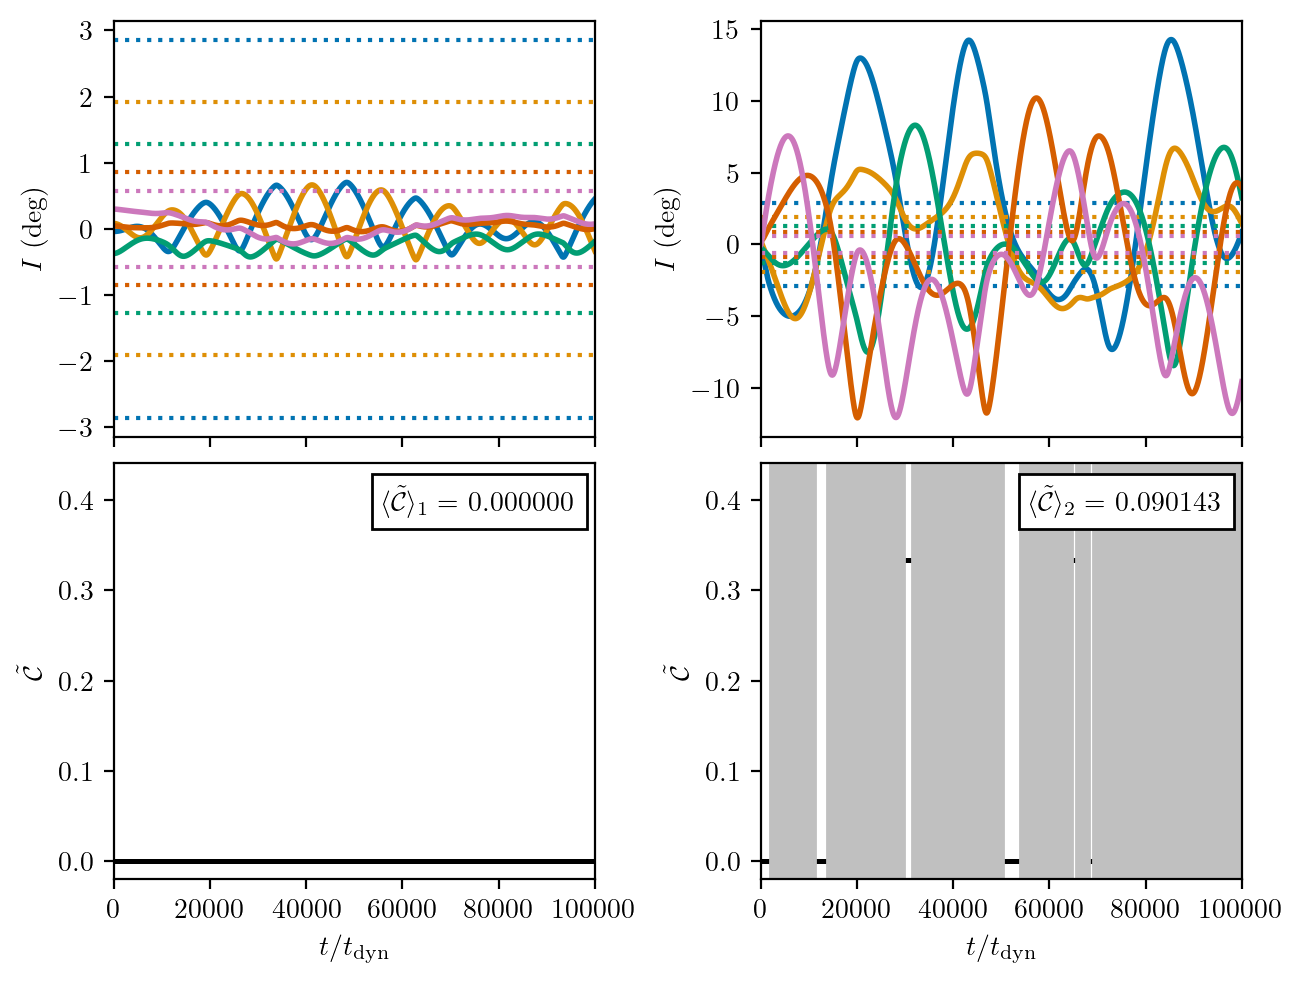

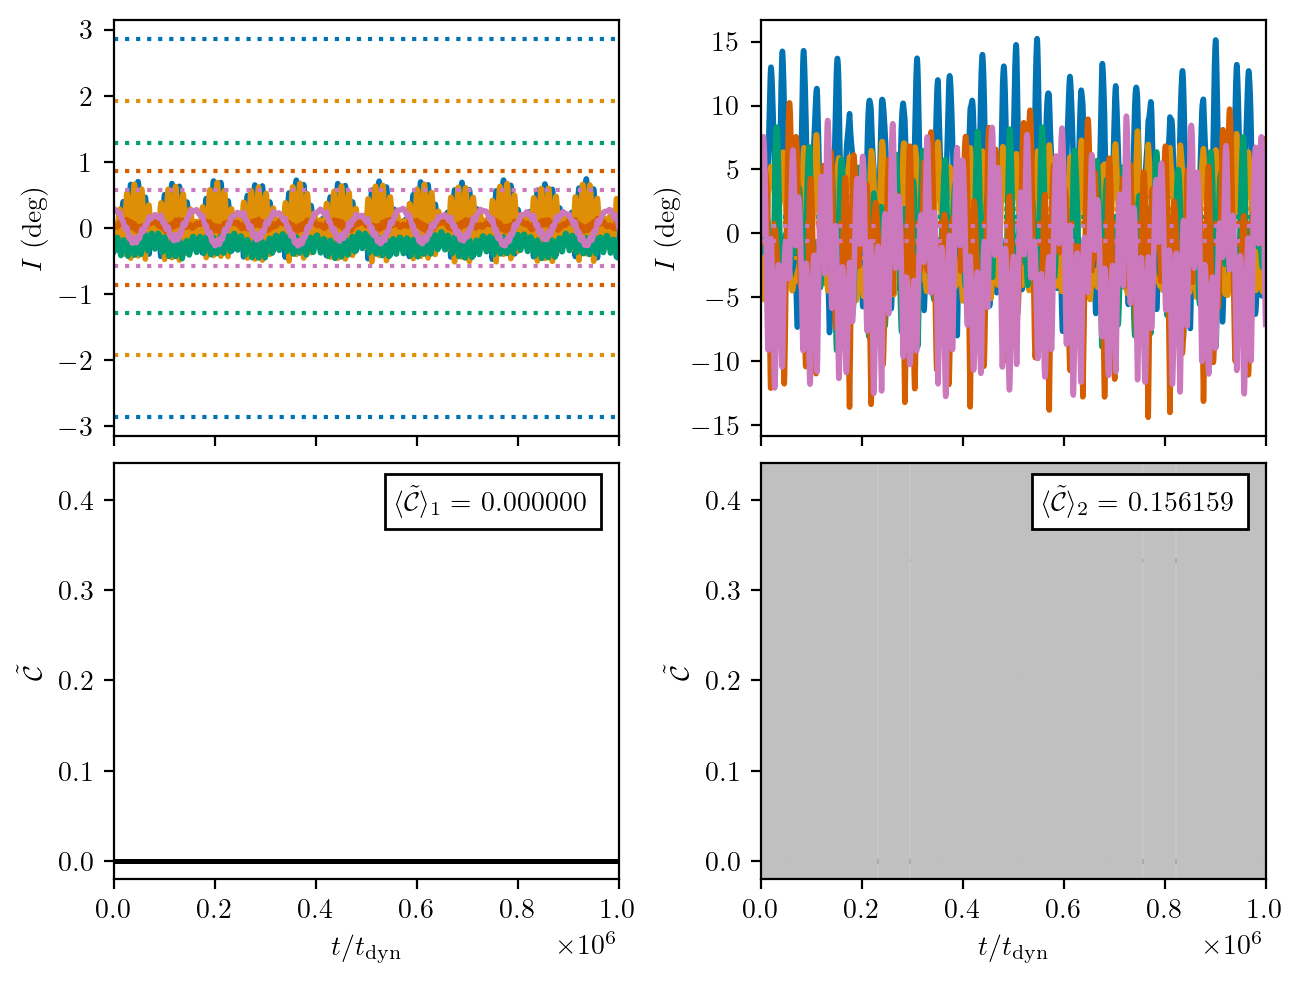

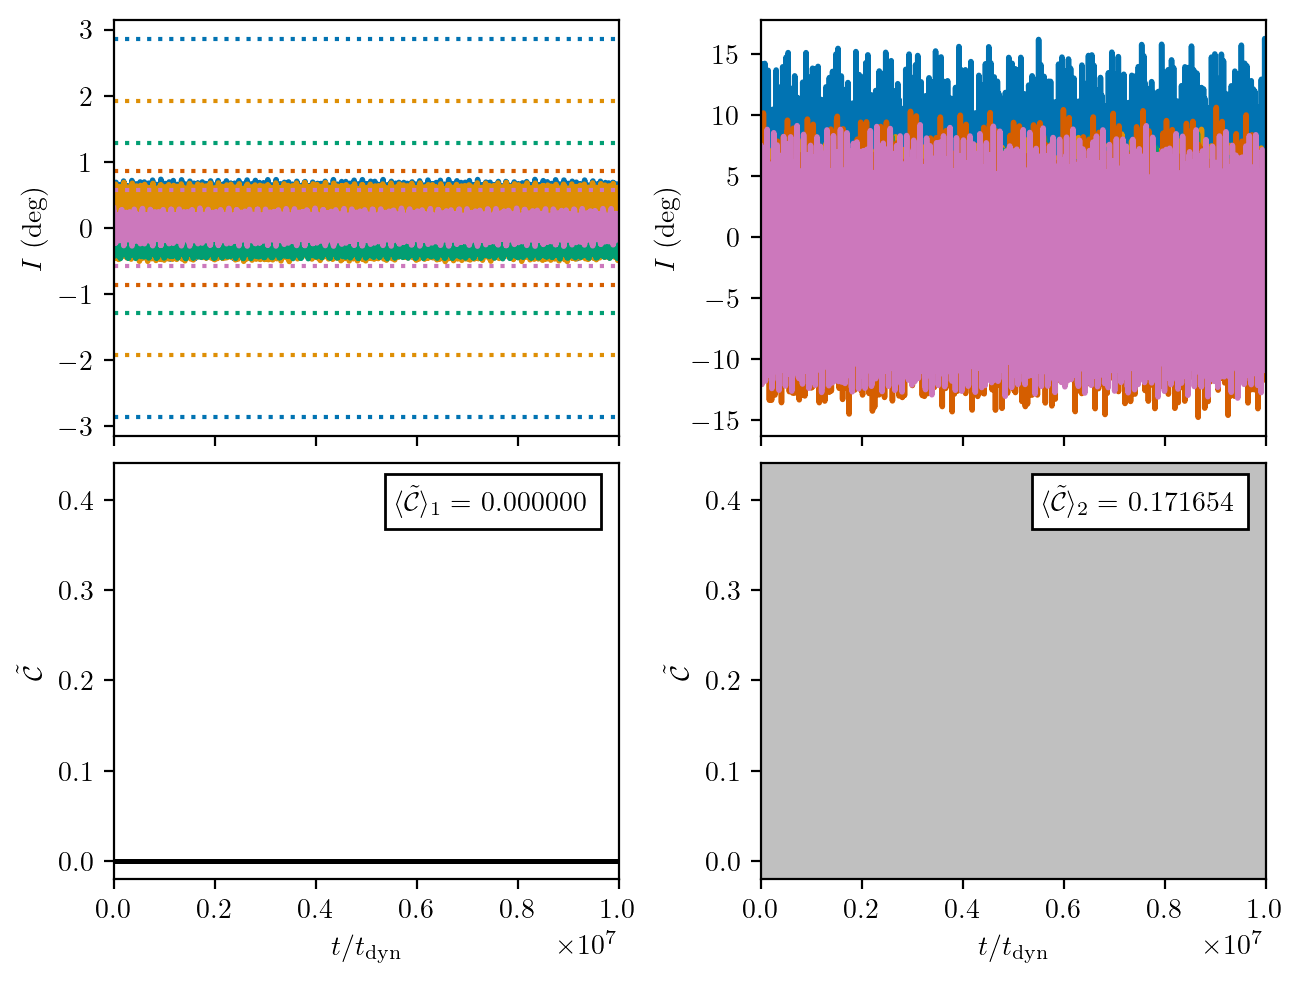

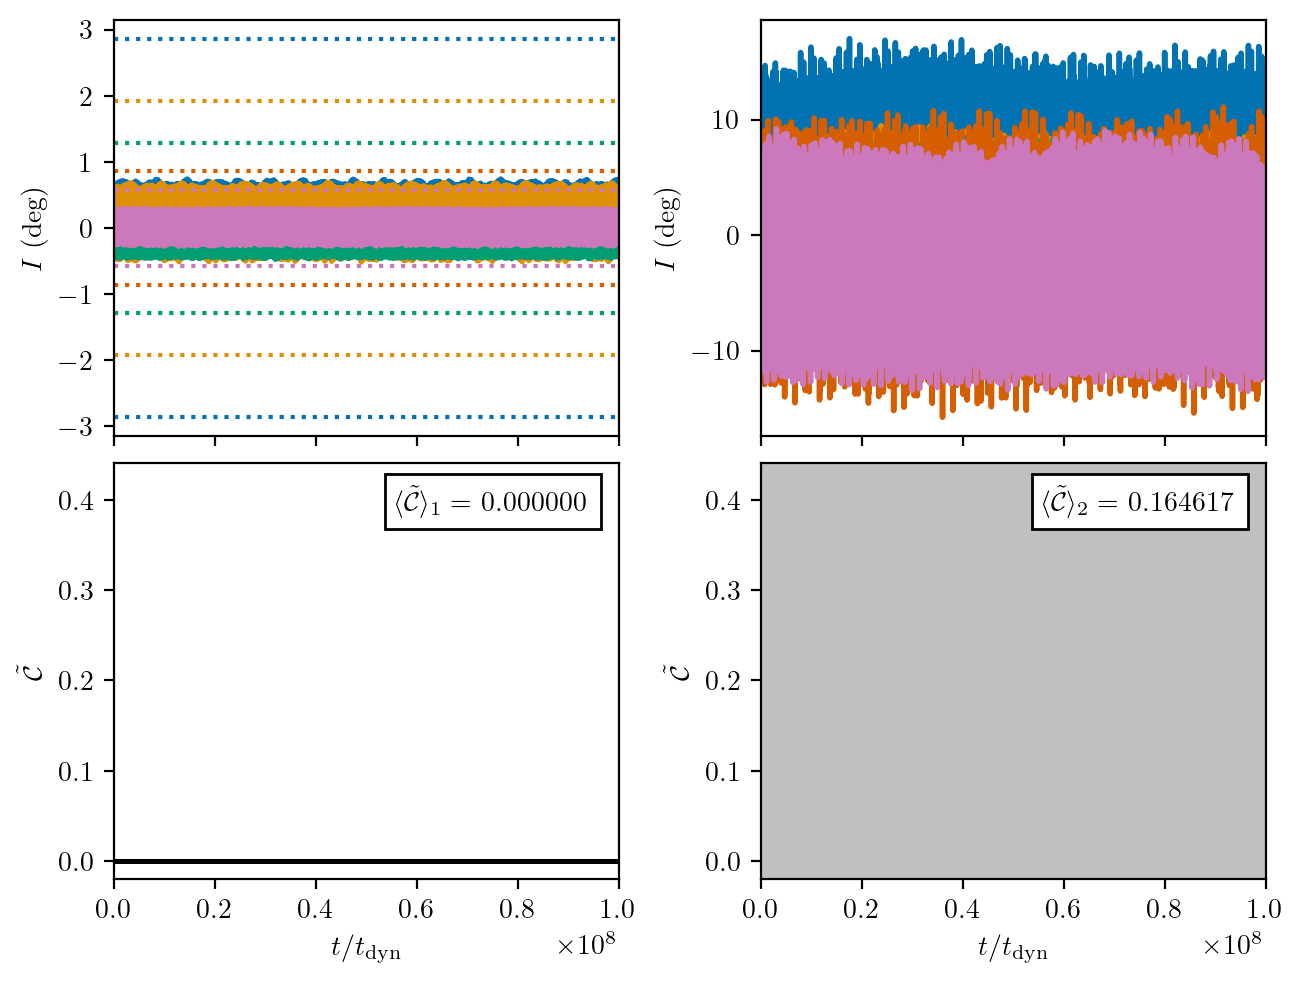

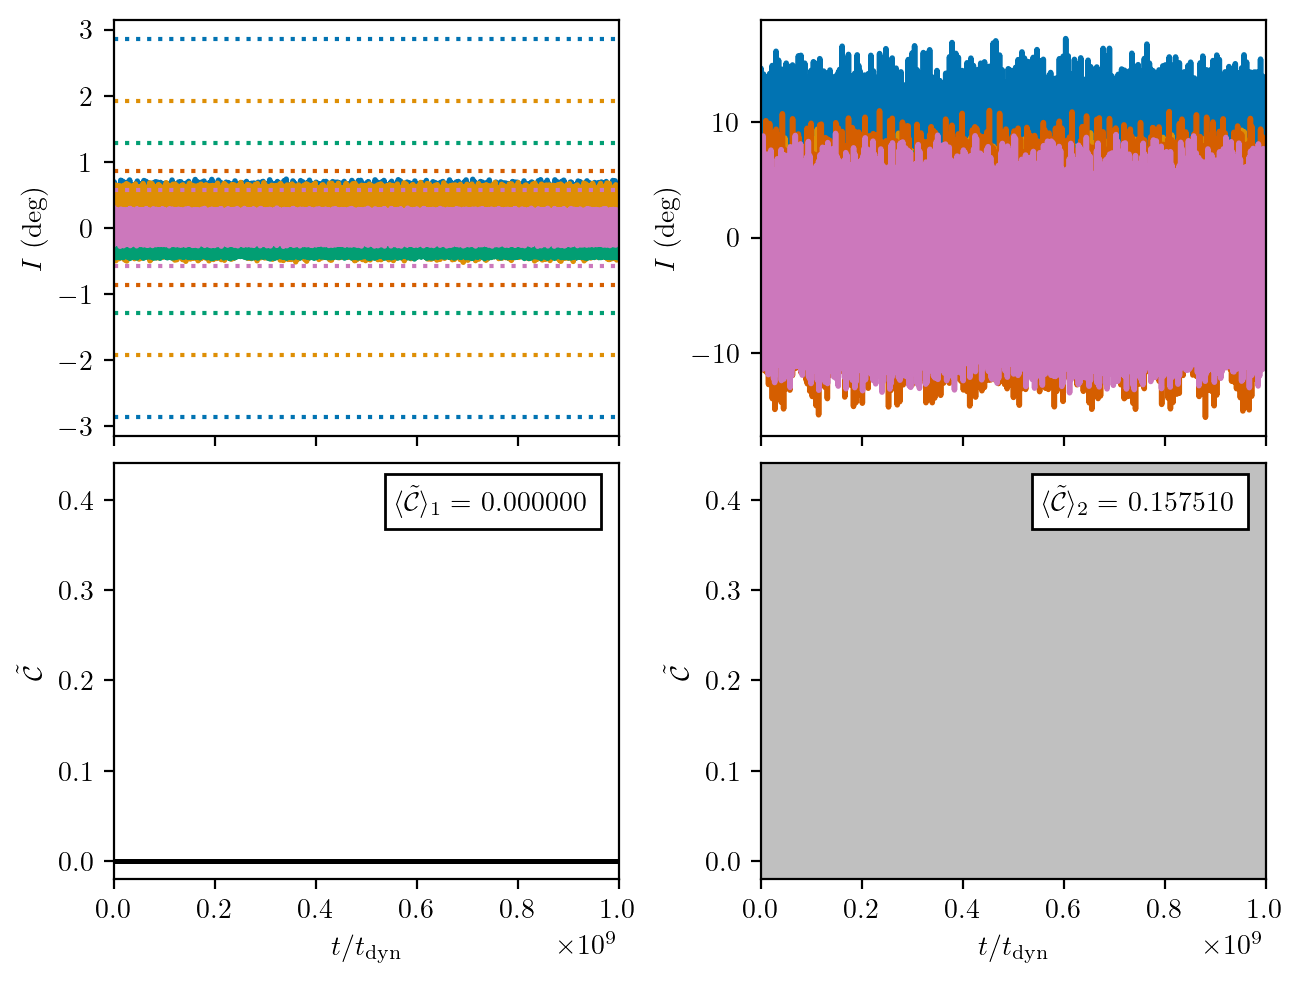

In [5]:
times = np.logspace(4., 9., 6)
multiple_simulation_times(times, m=0.1, a=4.0, N=5);

The following plots show how the average gap complexity evolves in a number of similarly constructed systems with a range of OG semi-major axes.

In [6]:
times = np.logspace(4., 9., 60)
smas = np.linspace(1., 10., 10)

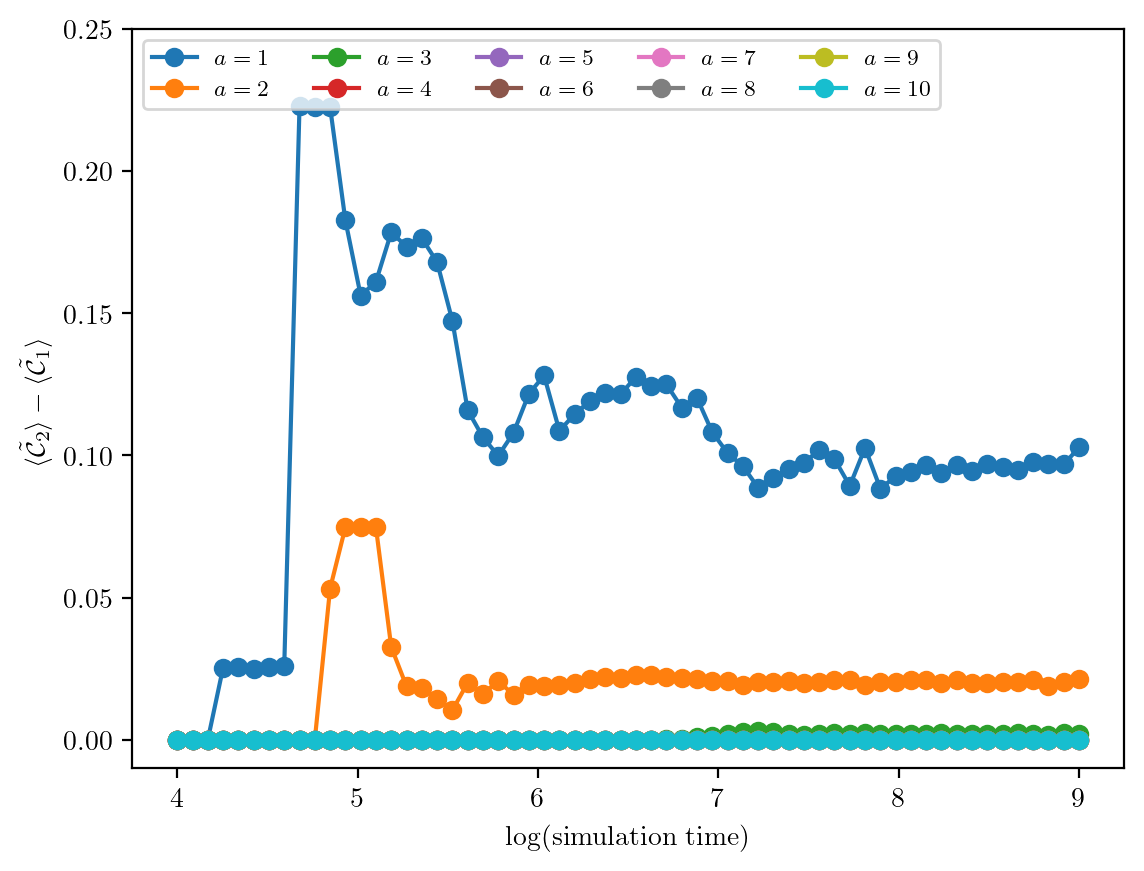

In [7]:
time_dependence_plot(times, smas, m=1.0e-3)

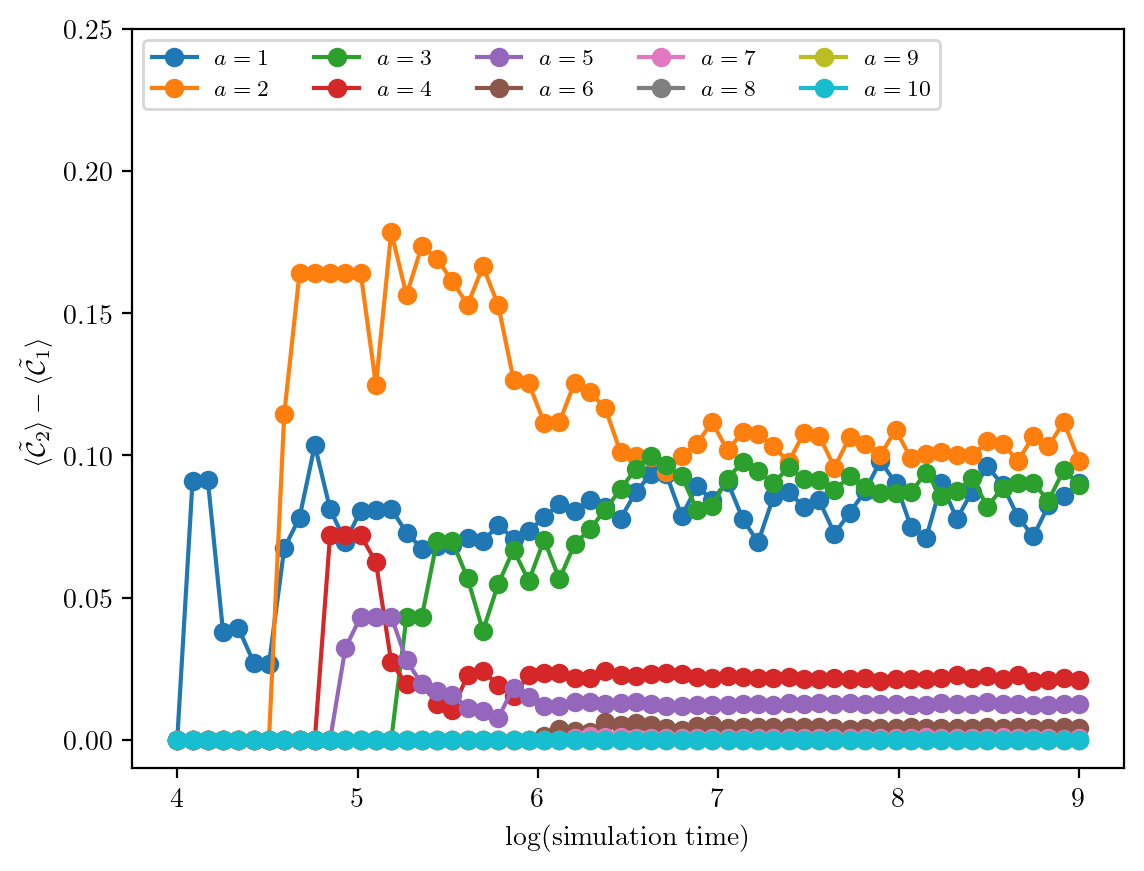

In [8]:
time_dependence_plot(times, smas, m=1.0e-2)

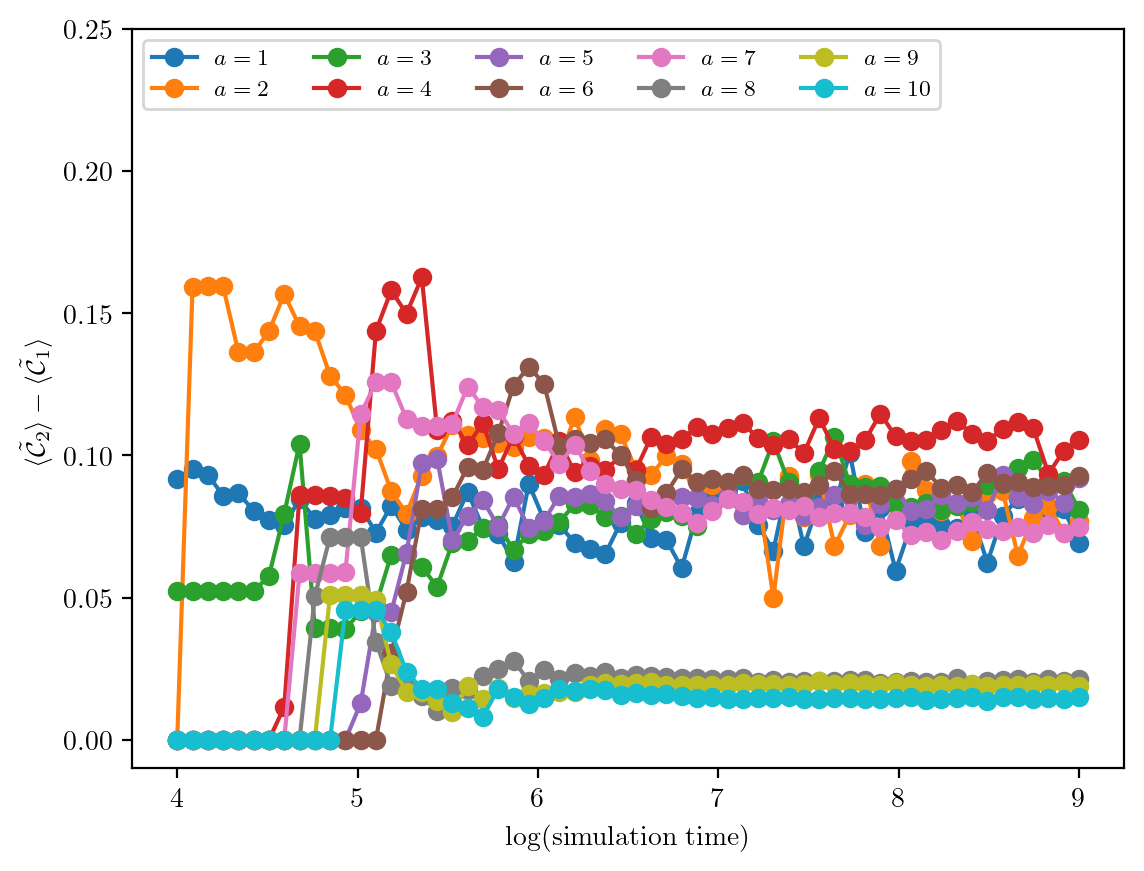

In [9]:
time_dependence_plot(times, smas, m=0.1)

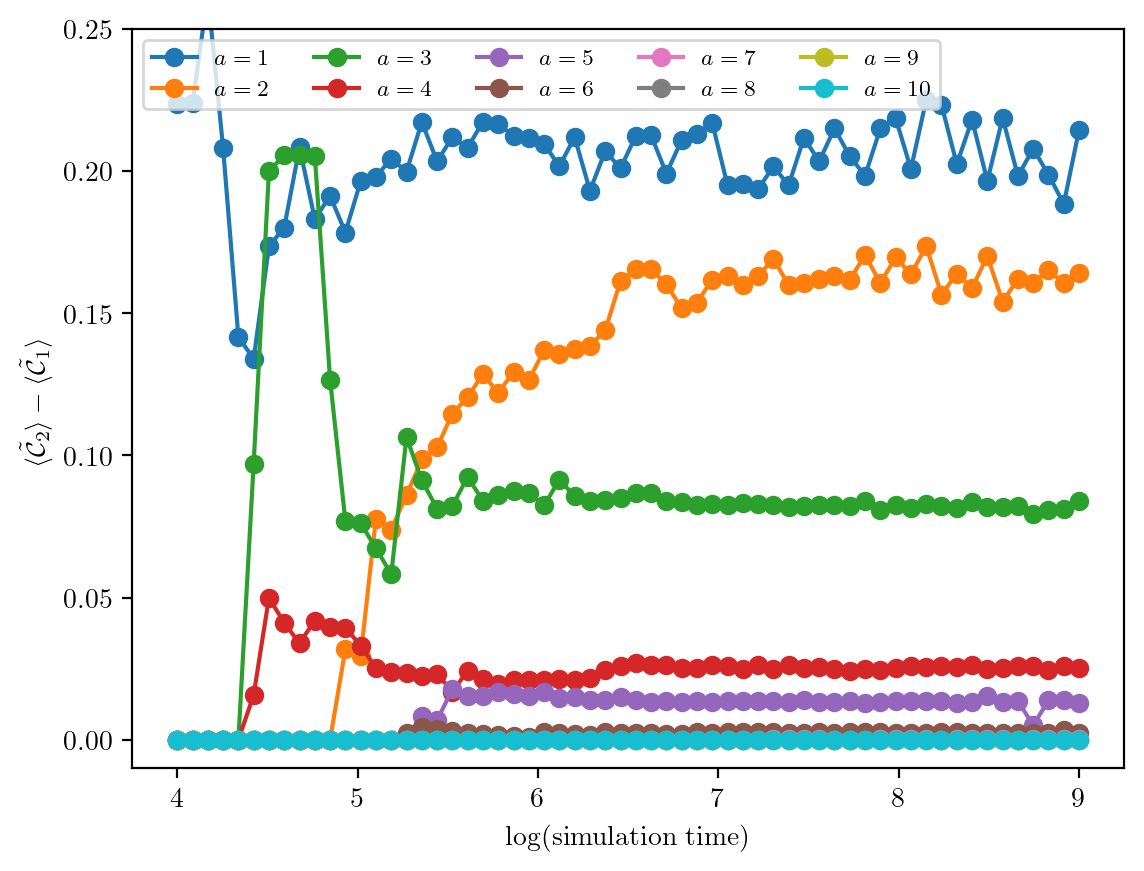

In [10]:
time_dependence_plot(times, smas, m=1.0e-2, N=5)